In [9]:
# Credits: https://github.com/keras-team/keras/blob/master/examples/mnist_cnn.py


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12

# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 228s 4ms/step - loss: 0.2652 - acc: 0.9174 - val_loss: 0.0601 - val_acc: 0.9810
Epoch 2/12
60000/60000 [==============================] - 218s 4ms/step - loss: 0.0887 - acc: 0.9736 - val_loss: 0.0391 - val_acc: 0.9874
Epoch 3/12
60000/60000 [==============================] - 242s 4ms/step - loss: 0.0663 - acc: 0.9803 - val_loss: 0.0397 - val_acc: 0.9872
Epoch 4/12
60000/60000 [==============================] - 230s 4ms/step - loss: 0.0540 - acc: 0.9838 - val_loss: 0.0344 - val_acc: 0.9883
Epoch 5/12
60000/60000 [==============================] - 232s 4ms/step - loss: 0.0474 - acc: 0.9862 - val_loss: 0.0312 - val_acc: 0.9897
Epoch 6/12
60000/60000 [==============================] - 269s 4ms/step - loss: 0.0421 - acc: 0.9871 - val_loss: 0.0288 - val_acc: 0.9907
Epoch 7/12
60000/60000 [=========================

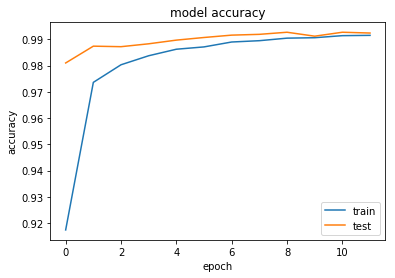

In [10]:
# list all data in history
#https://stackoverflow.com/questions/51731207/python-neural-network-typeerror-history-object-is-not-subscriptable
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(model.history.history['acc'])
plt.plot(model.history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

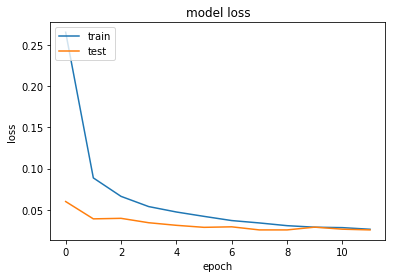

In [11]:
# summarize history for loss
#https://stackoverflow.com/questions/51731207/python-neural-network-typeerror-history-object-is-not-subscriptable
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# 2 x 2 kernel with maxpooling,dropout

In [3]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(Dropout(0.5))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Dropout(0.5))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 778s 13ms/step - loss: 0.2742 - acc: 0.9153 - val_loss: 0.0731 - val_acc: 0.9820
Epoch 2/12
60000/60000 [==============================] - 740s 12ms/step - loss: 0.0944 - acc: 0.9722 - val_loss: 0.0472 - val_acc: 0.9884
Epoch 3/12
60000/60000 [==============================] - 698s 12ms/step - loss: 0.0703 - acc: 0.9790 - val_loss: 0.0420 - val_acc: 0.9873
Epoch 4/12
60000/60000 [==============================] - 698s 12ms/step - loss: 0.0576 - acc: 0.9827 - val_loss: 0.0318 - val_acc: 0.9919
Epoch 5/12
60000/60000 [==============================] - 710s 12ms/step - loss: 0.0526 - acc: 0.9845 - val_loss: 0.0333 - val_acc: 0.9917
Epoch 6/12
60000/60000 [==============================] - 851s 14ms/step - loss: 0.0447 - acc: 0.9865 - val_loss: 0.0344 - val_acc: 0.9906
Epoch 7/12
60000/60000 [==============================] - 754s 13ms/step - loss: 0.0428 - acc: 0.9874 - val_loss: 0.

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


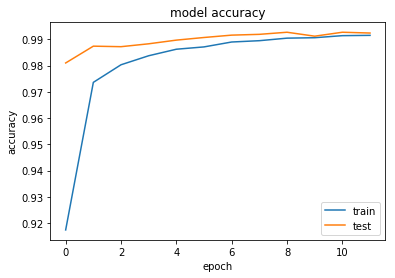

In [13]:
# list all data in history
#https://stackoverflow.com/questions/51731207/python-neural-network-typeerror-history-object-is-not-subscriptable
import matplotlib.pyplot as plt
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

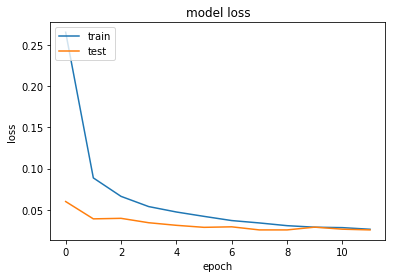

In [14]:
# summarize history for loss
#https://stackoverflow.com/questions/51731207/python-neural-network-typeerror-history-object-is-not-subscriptable
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# <h3> With batch normalization,max pooling and dropout</h3>

# with three layers

In [6]:
from keras.layers import BatchNormalization


from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(3, 3)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 404s 7ms/step - loss: 1.4731 - acc: 0.5175 - val_loss: 0.2578 - val_acc: 0.9272
Epoch 2/12
60000/60000 [==============================] - 394s 7ms/step - loss: 0.4277 - acc: 0.8670 - val_loss: 0.1228 - val_acc: 0.9628
Epoch 3/12
60000/60000 [==============================] - 417s 7ms/step - loss: 0.2774 - acc: 0.9179 - val_loss: 0.0733 - val_acc: 0.9779
Epoch 4/12
60000/60000 [==============================] - 401s 7ms/step - loss: 0.2183 - acc: 0.9352 - val_loss: 0.0562 - val_acc: 0.9837
Epoch 5/12
60000/60000 [==============================] - 385s 6ms/step - loss: 0.1828 - acc: 0.9456 - val_loss: 0.0481 - val_acc: 0.9861
Epoch 6/12
60000/60000 [==============================] - 381s 6ms/step - loss: 0.1597 - acc: 0.9523 - val_loss: 0.0493 - val_acc: 0.9866
Epoch 7/12
60000/60000 [=========================

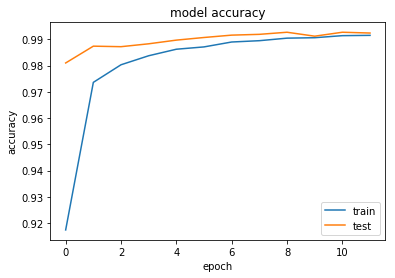

In [15]:
# summarize history for accuracy
#https://stackoverflow.com/questions/51731207/python-neural-network-typeerror-history-object-is-not-subscriptable
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

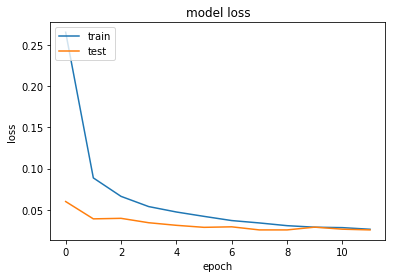

In [16]:
# summarize history for loss
#https://stackoverflow.com/questions/51731207/python-neural-network-typeerror-history-object-is-not-subscriptable
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# <h3>With five convolutional layers</h3>

In [1]:
from __future__ import print_function
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K

batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
model = Sequential()
model.add(Conv2D(524, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(360, (3,3), activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

history1=model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

C:\Users\Shashank\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 13754s 229ms/step - loss: 0.3211 - acc: 0.9012 - val_loss: 0.0561 - val_acc: 0.9815
Epoch 2/12
60000/60000 [==============================] - 11489s 191ms/step - loss: 0.0886 - acc: 0.9738 - val_loss: 0.0364 - val_acc: 0.9879
Epoch 3/12
60000/60000 [==============================] - 11691s 195ms/step - loss: 0.0642 - acc: 0.9808 - val_loss: 0.0424 - val_acc: 0.9869
Epoch 4/12
60000/60000 [==============================] - 10287s 171ms/step - loss: 0.0533 - acc: 0.9846 - val_loss: 0.0265 - val_acc: 0.9912
Epoch 5/12
60000/60000 [==============================] - 34341s 572ms/ste

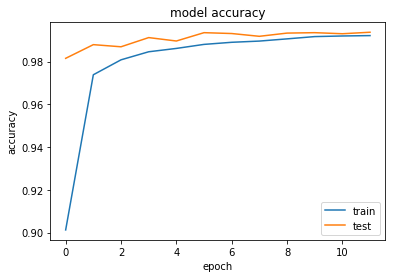

In [5]:
# summarize history for accuracy
#https://stackoverflow.com/questions/51731207/python-neural-network-typeerror-history-object-is-not-subscriptable
import matplotlib.pyplot as plt
plt.plot(history1.history['acc'])
plt.plot(history1.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'])
plt.show()

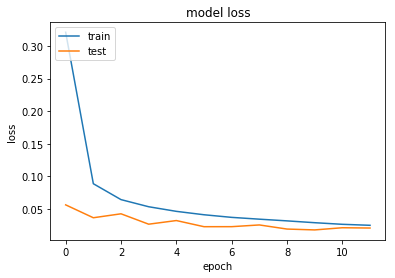

In [4]:
# summarize history for loss
#https://stackoverflow.com/questions/51731207/python-neural-network-typeerror-history-object-is-not-subscriptable
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [6]:
# http://zetcode.com/python/prettytable/
from prettytable import PrettyTable

#If you get a ModuleNotFoundError error , install prettytable using: pip3 install prettytable

x = PrettyTable()
x.field_names = ["Model","Test Loss","Test Accuracy"]
x.add_row([ "2 convolutional layers accuracy",0.0256,0.992])
x.add_row(["2 convolutional layers + dropout+ max pooling accuracy",0.0238,0.992])
x.add_row(["2 convolutional layers + dropout+ max pooling+batch normalization accuracy",0.0333,0.990])
x.add_row([ " 3 convolutional layers accuracy",0.033,99.23])
x.add_row([ "5 convolutional layers accuracy+max pooling",0.0205,0.993])


print(x)

+----------------------------------------------------------------------------+-----------+---------------+
|                                   Model                                    | Test Loss | Test Accuracy |
+----------------------------------------------------------------------------+-----------+---------------+
|                      2 convolutional layers accuracy                       |   0.0256  |     0.992     |
|           2 convolutional layers + dropout+ max pooling accuracy           |   0.0238  |     0.992     |
| 2 convolutional layers + dropout+ max pooling+batch normalization accuracy |   0.0333  |      0.99     |
|                       3 convolutional layers accuracy                      |   0.033   |     99.23     |
|                5 convolutional layers accuracy+max pooling                 |   0.0205  |     0.993     |
+----------------------------------------------------------------------------+-----------+---------------+


# Conclusion

1.In the first case we have two convolutional layers with droputout and max pooling.Here the value of dropout taken is 0.5 .

2.As we can see in the graph that train accuracy increases sharply upto .97 and hereafter train test loss remains constant .the gap between both train and tes loss gets narrowed.

3.From the graph it can be inferred that train loss decreases sharply upto 0.10 and from tehreon the gap between train and test loss  reduces and at some point it merges.

4.The same case happens with the thee three convolutional layers with slight  changes which can be inferred from the graph

5.Coming to the five layers one can see that accuracy incraese bit and no such significant changes as the datset for cnn is very small.